<a href="https://colab.research.google.com/github/Lusky16/hola/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [305]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions
import plotly.express as px

### Understanding the structure of the data

In [306]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [307]:
# read the data
path="/content/drive/MyDrive/Colab Notebooks/Proyect 1/foodhub_order.csv"
df = pd.read_csv(path)#('foodhub_order.csv')#
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. There are some not given data in rating.

### **Question 1:** How many rows and columns are present in the data?

In [308]:
# Write your code here
print( 'There are ', df.shape[0], 'rows  and ',df.shape[1] ,'columns , present in the data.')
#df.info

There are  1898 rows  and  9 columns , present in the data.


#### Observations: There are  1898 rows  and  9 columns , present in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [309]:
# Use info() to print a concise summary of the DataFrame #df.info()

In [310]:
#What are the datatypes of the different columns in the dataset
mesaje ='In this data set: \n '
for col in (df.columns):
    mesaje = mesaje +'''the column : ''' + df[col].name.__str__()+ '''  is  ''' +  df[col].dtype.__str__() + '''  Dtype, \n '''
print(mesaje)


In this data set: 
 the column : order_id  is  int64  Dtype, 
 the column : customer_id  is  int64  Dtype, 
 the column : restaurant_name  is  object  Dtype, 
 the column : cuisine_type  is  object  Dtype, 
 the column : cost_of_the_order  is  float64  Dtype, 
 the column : day_of_the_week  is  object  Dtype, 
 the column : rating  is  object  Dtype, 
 the column : food_preparation_time  is  int64  Dtype, 
 the column : delivery_time  is  int64  Dtype, 
 


#### Observations:
In this data set:
 the column : order_id  is  int64  Dtype,
 the column : customer_id  is  int64  Dtype,
 the column : restaurant_name  is  object  Dtype,
 the column : cuisine_type  is  object  Dtype,
 the column : cost_of_the_order  is  float64  Dtype,
 the column : day_of_the_week  is  object  Dtype,
 the column : rating  is  object  Dtype,
 the column : food_preparation_time  is  int64  Dtype,
 the column : delivery_time  is  int64  Dtype,



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [311]:
# Write your code here
if ( df.isnull().values.any()):
  print( 'Yes, there are any missing values in the data')
else:
  print( '''No, there aren't any missing values in the data''')


No, there aren't any missing values in the data


#### Observations: From the data, No, there aren't any missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [312]:
# Write your code here#df.describe()
print( 'About preparing the time of preparing, you have to wait at least', df.describe().loc['min','food_preparation_time'],
      'minuts, in average', df.describe().loc['50%','food_preparation_time'], 'minutes, and ', df.describe().loc['max','food_preparation_time'], 'the most.')

About preparing the time of preparing, you have to wait at least 20.0 minuts, in average 27.0 minutes, and  35.0 the most.


#### Observations:From the data you have to wait at least 20.0 minuts, in average 27.0 minutes, and  35.0 the most.


### **Question 5:** How many orders are not rated?

In [313]:
# Write the code here
dfx=df.groupby('rating').count()
#df.set_index('rating')
#total_sum=data.groupby('restaurant_name_type')['cost_of_the_order'].sum().to_frame().sort_values(by=['restaurant_name_type']).reset_index()
print( 'There are', dfx.loc['Not given','order_id'], 'whitout rate.')
#dfx

There are 736 whitout rate.


#### Observations:From the data, there are 736 whitout rate.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [314]:
data=df.copy()
data2=df.copy()
data['restaurant_name_type']=data['restaurant_name']+' '+data['cuisine_type']
total_sum=data.groupby('restaurant_name_type')['cost_of_the_order'].sum().to_frame().sort_values(by=['restaurant_name_type']).reset_index()
total_sum.columns = ['restaurant_name_type', 'sum_of_costs']
total_sum.set_index( 'restaurant_name_type')
#total_sum
total_count=data.groupby('restaurant_name_type')['cost_of_the_order'].count().to_frame().sort_values(by=['restaurant_name_type']).reset_index()
total_count.columns = ['restaurant_name_type', 'count_of_orders']
total_count.set_index( 'restaurant_name_type')
#total_count
total_sum
cuisine=[]
#sum_per_count=
cuisine=data.drop(['order_id','customer_id','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time','restaurant_name'], axis=1)
cuisine=cuisine.drop_duplicates()
cuisine = cuisine.sort_values(by=['restaurant_name_type'])
cuisine.set_index( 'restaurant_name_type')
#cuisine.columns = ['restaurant_name_type', 'cuisine_type']
cuisine
pv = []
pv = pd.pivot_table(data, values=['cost_of_the_order'], index=[ 'restaurant_name_type'],
                       columns='day_of_the_week',  aggfunc={'cost_of_the_order': ["sum", "count"]}, fill_value=0)
pv.columns = pv.columns.droplevel([1,0])
pv.columns = ['Weekday_count',  'Weekend_count', 'Weekday_sum',  'Weekend_sum']
pv= pv.sort_values(by=['restaurant_name_type'])

#pv.set_index( 'restaurant_name_type')
pv
df2=pv.copy()
df2=df2.merge(total_sum, how='inner', on='restaurant_name_type')
df2=df2.merge(total_count, how='inner', on='restaurant_name_type')
df2=df2.merge(cuisine, how='inner', on='restaurant_name_type')
df2.set_index( 'restaurant_name_type').reset_index()
#df=df.drop(['index'], axis=1)

df2['cost_by_count']= df2['sum_of_costs'] / df2['count_of_orders']

df3=df2.copy()

In [315]:
df2.describe()


,Weekday_count,Weekend_count,Weekday_sum,Weekend_sum,sum_of_costs,count_of_orders,cost_by_count
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.055866,7.547486,49.844804,125.098324,174.943128,10.603352,16.536309
std,7.355133,16.327468,122.973430,267.073373,385.209630,23.462238,5.218199
min,0.000000,0.000000,0.000000,0.000000,5.720000,1.000000,5.720000
25%,0.000000,1.000000,0.000000,15.205000,23.960000,1.000000,13.198333
50%,1.000000,2.000000,14.650000,41.280000,54.950000,3.000000,16.060000
75%,3.000000,7.000000,42.685000,107.255000,126.460000,9.000000,18.851111
max,74.000000,145.000000,1238.280000,2341.250000,3579.530000,219.000000,32.930000


In [316]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [317]:
 #df.set_index('cost_of_the_order').loc[0]


### Observations:
There are 178 restaurants, one of the restaurants shows 2 kinds of cuisine, so it is splited in 2 creating a colum that combine the name of the restaurant and the cuisine.
df2 is a table that sumarizes the data by restaurand and cuisine combination.

In [318]:
#
Margin=0.05
cost=0
df2['earns']= (df2['sum_of_costs'] * Margin) - (cost * df2['count_of_orders'])
df2['earns_by_count']= df2['earns'] / df2['count_of_orders']
fig = px.histogram(df2.sort_values(by=['earns'], ascending=False), x="restaurant_name_type", y="earns")
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

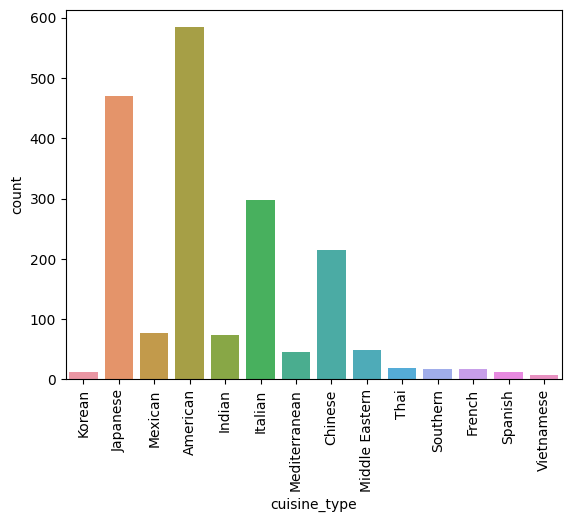

In [319]:
sns.countplot(data=df, x='cuisine_type')#; hue:'restaurant_name',
plt.xticks(rotation=90)

In [320]:
df2.describe()

,Weekday_count,Weekend_count,Weekday_sum,Weekend_sum,sum_of_costs,count_of_orders,cost_by_count,earns,earns_by_count
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.055866,7.547486,49.844804,125.098324,174.943128,10.603352,16.536309,8.747156,0.826815
std,7.355133,16.327468,122.973430,267.073373,385.209630,23.462238,5.218199,19.260481,0.260910
min,0.000000,0.000000,0.000000,0.000000,5.720000,1.000000,5.720000,0.286000,0.286000
25%,0.000000,1.000000,0.000000,15.205000,23.960000,1.000000,13.198333,1.198000,0.659917
50%,1.000000,2.000000,14.650000,41.280000,54.950000,3.000000,16.060000,2.747500,0.803000
75%,3.000000,7.000000,42.685000,107.255000,126.460000,9.000000,18.851111,6.323000,0.942556
max,74.000000,145.000000,1238.280000,2341.250000,3579.530000,219.000000,32.930000,178.976500,1.646500


In [321]:
# Write your code here#df.describe()
print( 'About earns by parner, whit a percentaje of ', Margin*100 ,
      '% it means for that dataset minimun earn per client is', round(df2.describe().loc['min','earns'],2),
      'over all, in average', round(df2.describe().loc['50%','earns'],2),' and ', round(df2.describe().loc['max','earns'],2), 'the most.')

About earns by parner, whit a percentaje of  5.0 % it means for that dataset minimun earn per client is 0.29 over all, in average 2.75  and  178.98 the most.


### Observations:
 About earns by parner, we will asume a earning percentaje of  5.0 % it mean for that dataset minimun earn per client is 0.29 over all, in average 2.75  and  178.98 the most.

In [322]:
fig = px.histogram(df2.sort_values(by=['earns'], ascending=False), x="cuisine_type", y="earns")
fig.show()

In [323]:
print( 'About earns by food, whit a percentaje of ', Margin*100 ,
      '% it means for that dataset minimun earn per client is', 4.5,'and 476,5 the most. As shows the grafic')

About earns by food, whit a percentaje of  5.0 % it means for that dataset minimun earn per client is 4.5 and 476,5 the most. As shows the grafic


### Observations:
It is more earns for American food.

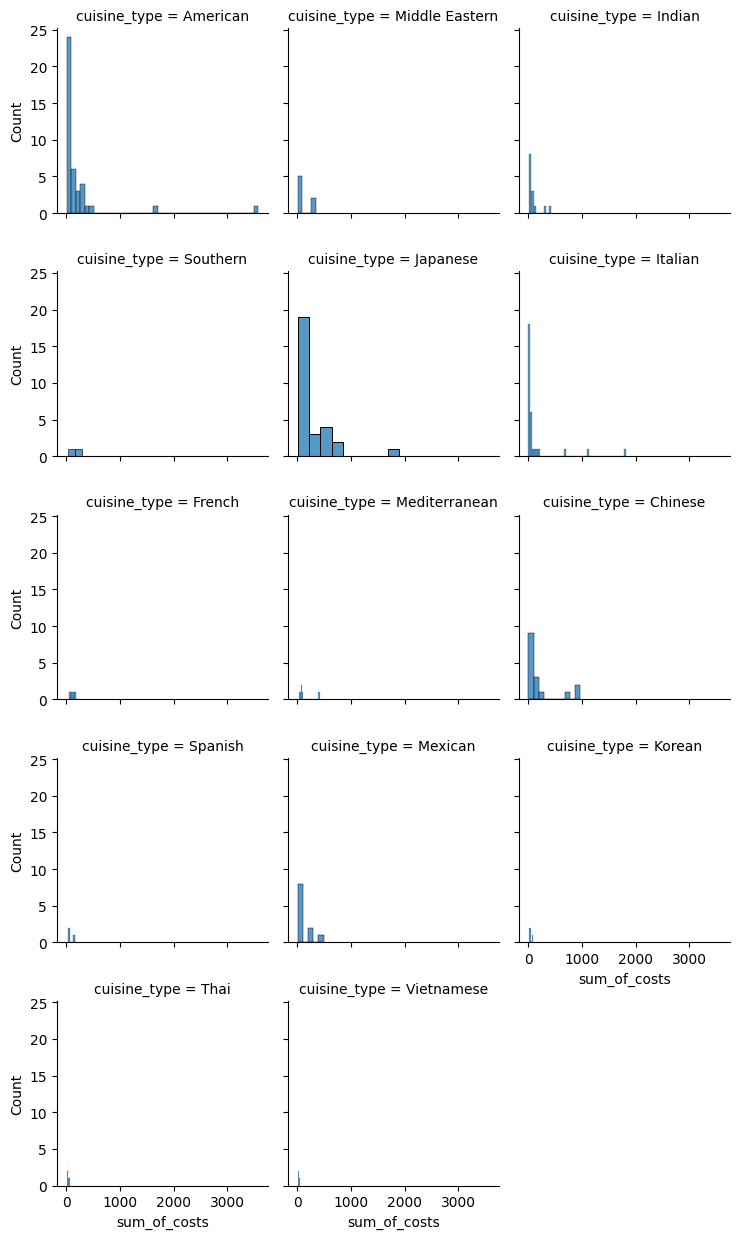

In [324]:
g = sns.FacetGrid(df2, col='cuisine_type', height=2.5, col_wrap=3)
g.map(sns.histplot, 'sum_of_costs')

In [325]:
fig = px.box(df, x="day_of_the_week", y="cost_of_the_order", points="all")
fig.show()

### Observations:
The American food has prices per order similar to the others.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [326]:
# Write the code here
#df2.sort_values(by,'count_of_orders')
#total_sum
fig = px.histogram(df2.sort_values(by=['sum_of_costs'], ascending=False), x="restaurant_name_type", y="sum_of_costs")
fig.show()

In [327]:
df2

,restaurant_name_type,Weekday_count,Weekend_count,Weekday_sum,Weekend_sum,sum_of_costs,count_of_orders,cuisine_type,cost_by_count,earns,earns_by_count
0,'wichcraft American,1,0,8.10,0.00,8.10,1,American,8.100000,0.4050,0.405000
1,12 Chairs Middle Eastern,2,2,45.35,43.22,88.57,4,Middle Eastern,22.142500,4.4285,1.107125
2,5 Napkin Burger American,2,3,16.30,63.54,79.84,5,American,15.968000,3.9920,0.798400
3,67 Burger American,1,0,29.05,0.00,29.05,1,American,29.050000,1.4525,1.452500
4,Alidoro American,0,1,0.00,12.61,12.61,1,American,12.610000,0.6305,0.630500
...,...,...,...,...,...,...,...,...,...,...,...
174,Zero Otto Nove Italian,1,1,12.18,5.87,18.05,2,Italian,9.025000,0.9025,0.451250
175,brgr American,1,1,5.72,14.07,19.79,2,American,9.895000,0.9895,0.494750
176,da Umberto Italian,1,2,12.27,40.59,52.86,3,Italian,17.620000,2.6430,0.881000
177,ilili Restaurant Middle Eastern,9,9,178.84,164.38,343.22,18,Middle Eastern,19.067778,17.1610,0.953389


In [328]:
df2=df2.sort_values(by=['count_of_orders'], ascending=False).head()
df2.set_index('restaurant_name_type')

,Weekday_count,Weekend_count,Weekday_sum,Weekend_sum,sum_of_costs,count_of_orders,cuisine_type,cost_by_count,earns,earns_by_count
restaurant_name_type,,,,,,,,,,
Shake Shack American,74,145,1238.28,2341.25,3579.53,219,American,16.344886,178.9765,0.817244
Blue Ribbon Sushi Japanese,34,85,577.37,1326.58,1903.95,119,Japanese,15.999580,95.1975,0.799979
The Meatball Shop Italian,35,77,562.34,1258.67,1821.01,112,Italian,16.259018,91.0505,0.812951
Blue Ribbon Fried Chicken American,22,74,351.16,1311.13,1662.29,96,American,17.315521,83.1145,0.865776
Parm Italian,26,42,463.18,649.58,1112.76,68,Italian,16.364118,55.6380,0.818206


In [329]:
mesaje ='In this data set, the top 5 restaurants in terms of the number of orders received are : '
for i in range(5):
    mesaje = mesaje +'''\n # '''+ (i+1).__str__() +''' the restaurant ''' + (df2.iloc[i,0]).__str__()+ '''  whit  ''' + (df2.iloc[i,6]).__str__() + '''  orders, '''
print(mesaje)


In this data set, the top 5 restaurants in terms of the number of orders received are : 
 # 1 the restaurant Shake Shack American  whit  219  orders, 
 # 2 the restaurant Blue Ribbon Sushi Japanese  whit  119  orders, 
 # 3 the restaurant The Meatball Shop Italian  whit  112  orders, 
 # 4 the restaurant Blue Ribbon Fried Chicken American  whit  96  orders, 
 # 5 the restaurant Parm Italian  whit  68  orders, 


#### Observations:
In this data set, the top 5 restaurants in terms of the number of orders received are :
  1 the restaurant Shake Shack American  whit  219  orders,
  2 the restaurant Blue Ribbon Sushi Japanese  whit  119  orders,
  3 the restaurant The Meatball Shop Italian  whit  112  orders,
  4 the restaurant Blue Ribbon Fried Chicken American  whit  96  orders,
  5 the restaurant Parm Italian  whit  68  orders,


### **Question 8**: Which is the most popular cuisine on weekends?

In [330]:
pv = []
pv = pd.pivot_table(df, values=['cost_of_the_order'], index=[ 'cuisine_type'],
                       columns='day_of_the_week',  aggfunc={'cost_of_the_order': ["sum", "count"]}, fill_value=0)
pv.columns = pv.columns.droplevel([1,0])
pv.columns = ['Weekday_count',  'Weekend_count', 'Weekday_sum',  'Weekend_sum']
pv[ 'cuisine_type']=pv.index
pv= pv.sort_values(by=['Weekend_count'], ascending=False)
pv



,Weekday_count,Weekend_count,Weekday_sum,Weekend_sum,cuisine_type
cuisine_type,,,,,
American,169,415,2587.11,6943.67,American
Japanese,135,335,2209.69,5453.44,Japanese
Italian,91,207,1537.00,3355.77,Italian
Chinese,52,163,891.68,2613.94,Chinese
Mexican,24,53,397.34,906.51,Mexican
Indian,24,49,411.90,823.24,Indian
Mediterranean,14,32,196.56,515.28,Mediterranean
Middle Eastern,17,32,337.16,585.05,Middle Eastern
Thai,4,15,61.85,303.10,Thai


In [331]:

mesaje ='In this data set, the top 5 cuisine types in weekends are : '
for i in range(5):
    mesaje = mesaje +'''\n # '''+ (i+1).__str__() +''' '''+  (pv.iloc[i,4]).__str__() + '''  whit  '''  + (pv.iloc[i,1]).__str__()+ '''  orders, '''
print(mesaje)

In this data set, the top 5 cuisine types in weekends are : 
 # 1 American  whit  415  orders, 
 # 2 Japanese  whit  335  orders, 
 # 3 Italian  whit  207  orders, 
 # 4 Chinese  whit  163  orders, 
 # 5 Mexican  whit  53  orders, 


#### Observations:
The American cuisine has more orders on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [332]:
# Write the code here
n=0
for i in range(df.shape[0]):
  if (df.iloc[i,4] >20):
    n=n+1
print(round((n/df.shape[0]*100),2).__str__() + '''%'''+' of the orders cost more than 20 dollars.')

29.24% of the orders cost more than 20 dollars.


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [333]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [334]:
# Write the code here
print( round((df.describe().iloc[5,4]),2).__str__() +' minutes is the mean order delivery time')

25.0 minutes is the mean order delivery time


#### Observations:
25.0 minutes is the mean order delivery time

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [335]:
by_costumer=df.groupby('customer_id')['cost_of_the_order'].count().to_frame().sort_values(by=['cost_of_the_order'], ascending=False).reset_index()
by_costumer.columns = ['customer_id', 'count_of_orders']
by_costumer
#by_costumer.set_index( 'count_of_orders')
#total_count

n=3
mesaje= ''' The company's has top 3 most frequent customers, are '''

for i in range(n):
    mesaje=mesaje+''' \n '''+(by_costumer.iloc[i,0]).__str__() + ''' with ''' + (by_costumer.iloc[i,1]).__str__() +''' requests'''
print (mesaje)


 The company's has top 3 most frequent customers, are  
 52832 with 13 requests 
 47440 with 10 requests 
 83287 with 9 requests


#### Observations:
 The company's has top 3 most frequent customers, are  
 52832 with 13 requests
 47440 with 10 requests
 83287 with 9 requests


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [336]:
# Write the code here
fig_3d = px.scatter_3d(df, x='cuisine_type', y='cost_of_the_order', z='day_of_the_week', color='cost_of_the_order')
fig_3d.show()

#### Observations:
There are more Korean requests on weekends

In [337]:
fig = px.box(df, x="cuisine_type", y="cost_of_the_order", points="all")
fig.show()

In [338]:
fig = px.histogram(df, x="cost_of_the_order", y="cuisine_type", histfunc='sum')
fig.show()

In [339]:
fig = px.histogram(df, x="cost_of_the_order", y="cuisine_type", histfunc='count')
fig.show()

In [340]:
data_American=df.copy()
data_American.set_index('cuisine_type')
data_American['American']=data_American['cuisine_type'].mask(data_American['cuisine_type'] != 'American', np.nan)
data_American=data_American.dropna()

data_American.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,American
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,American
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,American
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,American
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30,American
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,American


In [341]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [342]:
data_American.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,5.840000e+02,584.000000,584.000000,584.000000,584.000000
mean,1.477489e+06,184169.683219,16.319829,27.440068,24.193493
std,5.480961e+02,117053.360189,7.462290,4.658474,4.831844
min,1.476547e+06,14869.000000,4.710000,20.000000,15.000000
25%,1.477016e+06,80045.250000,12.080000,23.000000,20.000000
50%,1.477462e+06,141981.500000,14.120000,27.000000,25.000000
75%,1.477980e+06,300549.750000,22.260000,31.000000,28.000000
max,1.478444e+06,403019.000000,33.180000,35.000000,33.000000


In [343]:
fig = px.histogram(data_American.sort_values(by=['cost_of_the_order'], ascending=False), x="restaurant_name", y="cost_of_the_order")
fig.show()

In [344]:
fig = px.histogram(df, x="cost_of_the_order", color="day_of_the_week")
fig.show()

## Comparing

In [345]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [346]:
data_American.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,5.840000e+02,584.000000,584.000000,584.000000,584.000000
mean,1.477489e+06,184169.683219,16.319829,27.440068,24.193493
std,5.480961e+02,117053.360189,7.462290,4.658474,4.831844
min,1.476547e+06,14869.000000,4.710000,20.000000,15.000000
25%,1.477016e+06,80045.250000,12.080000,23.000000,20.000000
50%,1.477462e+06,141981.500000,14.120000,27.000000,25.000000
75%,1.477980e+06,300549.750000,22.260000,31.000000,28.000000
max,1.478444e+06,403019.000000,33.180000,35.000000,33.000000


In [347]:
mesaje = ''' \n['cost_of_the_order']['count']/['cost_of_the_order']['count']  '''

In [348]:
mesaje =mesaje + (data_American.describe()['cost_of_the_order']['count']/df.describe()['cost_of_the_order']['count']).__str__()

In [349]:
mesaje =mesaje +'''\n['cost_of_the_order']['mean']/['cost_of_the_order']['mean']'''

In [350]:
mesaje =mesaje + (data_American.describe()['cost_of_the_order']['mean']/df.describe()['cost_of_the_order']['mean']).__str__()

In [351]:
mesaje =mesaje +'''\n['cost_of_the_order']['max']/df.describe()['cost_of_the_order']['max']'''

In [352]:
mesaje =mesaje + (data_American.describe()['cost_of_the_order']['max']/df.describe()['cost_of_the_order']['max']).__str__()

In [353]:
mesaje =mesaje +'''\n['food_preparation_time']['count']/df.describe()['food_preparation_time']['count']).__str__()'''

In [354]:
mesaje =mesaje + (data_American.describe()['food_preparation_time']['count']/df.describe()['food_preparation_time']['count']).__str__()

In [355]:
mesaje =mesaje +'''\n['food_preparation_time']['mean']/df.describe()['food_preparation_time']['mean']'''

In [356]:
mesaje =mesaje + (data_American.describe()['food_preparation_time']['mean']/df.describe()['food_preparation_time']['mean']).__str__()

In [357]:
mesaje =mesaje +'''\n['food_preparation_time']['max']/df.describe()['food_preparation_time']['max']'''

In [358]:
mesaje =mesaje + (data_American.describe()['food_preparation_time']['max']/df.describe()['food_preparation_time']['max']).__str__()

In [359]:
mesaje =mesaje +'''\n['delivery_time']['count']/df.describe()['delivery_time']['count']'''

In [360]:
mesaje =mesaje + (data_American.describe()['delivery_time']['count']/df.describe()['delivery_time']['count']).__str__()

In [361]:
mesaje =mesaje +'''\n['delivery_time']['mean']/df.describe()['delivery_time']['mean']'''

In [362]:
mesaje =mesaje + (data_American.describe()['delivery_time']['mean']/df.describe()['delivery_time']['mean']).__str__()

In [363]:
mesaje =mesaje +'''\n['delivery_time']['std']/df.describe()['delivery_time']['std']'''

In [364]:
mesaje =mesaje + (data_American.describe()['delivery_time']['std']/df.describe()['delivery_time']['std']).__str__()

In [365]:
mesaje =mesaje +'''\n['delivery_time']['max']/df.describe()['delivery_time']['max']'''

In [366]:
mesaje =mesaje + (data_American.describe()['delivery_time']['max']/df.describe()['delivery_time']['max']).__str__()

In [367]:
print(mesaje)

 
['cost_of_the_order']['count']/['cost_of_the_order']['count']  0.3076923076923077
['cost_of_the_order']['mean']/['cost_of_the_order']['mean']0.9891493867759736
['cost_of_the_order']['max']/df.describe()['cost_of_the_order']['max']0.9370234397062978
['food_preparation_time']['count']/df.describe()['food_preparation_time']['count']).__str__()0.3076923076923077
['food_preparation_time']['mean']/df.describe()['food_preparation_time']['mean']1.00248787342162
['food_preparation_time']['max']/df.describe()['food_preparation_time']['max']1.0
['delivery_time']['count']/df.describe()['delivery_time']['count']0.3076923076923077
['delivery_time']['mean']/df.describe()['delivery_time']['mean']1.0013138097211016
['delivery_time']['std']/df.describe()['delivery_time']['std']0.9716864495105236
['delivery_time']['max']/df.describe()['delivery_time']['max']1.0


In [368]:
print("Compering with the total data, American food is around a third of the data: " + round(data_American.describe()['cost_of_the_order']['count']/df.describe()['cost_of_the_order']['count']*100,2).__str__()+"%, the other calculations show the same behavior of the table" )

Compering with the total data, American food is around a third of the data: 30.77%, the other calculations show the same behavior of the table


## Observations:
Compering with the total data, American food is around a third of the data: 30.77%, the other calculations show the same behavior of the table, the amount of ears response to the quantity of sails.

## **Question 13:**
The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [369]:
df=data2

In [370]:

df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [371]:
print(type(df.iloc[0,6])==str)

True


In [372]:
#for col in (dft.columns):
 # if (((dft.iloc[col,6]))==0):
  #  print(dft.iloc[col,6])


In [373]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [374]:
#df.groupby(by=["b"], dropna=False).sum()

dft=df.groupby('customer_id', dropna=False)['rating'].sum().to_frame().sort_values(by=['rating']).reset_index()
dft.columns = ['customer_id', 'rating']
dfu=df.groupby('customer_id', dropna=False)['rating'].count().to_frame().sort_values(by=['rating']).reset_index()

dft=dfu.merge(dft, how='inner', on='customer_id')
dft





,customer_id,rating_x,rating_y
0,1311,1,Not given
1,175327,1,3
2,176234,1,5
3,178172,1,4
4,178846,1,4
...,...,...,...
1195,65009,7,55455Not given5
1196,250494,8,4554Not given55Not given
1197,83287,9,5Not given55Not given4Not givenNot givenNot given
1198,47440,10,Not givenNot given453344Not given4


In [375]:
#for i in range(dft.shape[0]):
 # if (type(dft.iloc[6,i])==str):
  #  dft = dft.drop(index=i, level=0)
  #else:
   # print(".")

#print(type(df.iloc[0,6])==str)

In [376]:
dft=df.groupby(by=['customer_id'], dropna=False).sum([]).reset_index()
dft

,customer_id,order_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1311,1477236,Chipotle Mexican Grill $1.99 Delivery,Mexican,16.10,Weekend,Not given,22,26
1,5139,1477855,Sushi of Gari 46,Japanese,22.26,Weekend,5,28,22
2,5444,1477357,Go! Go! Curry!,Japanese,20.18,Weekend,3,22,29
3,5693,1478155,The Meatball Shop,Italian,8.30,Weekday,Not given,29,32
4,6987,2954775,Hill Country Fried ChickenHill Country Fried C...,SouthernSouthern,42.01,WeekdayWeekday,Not given4,55,62
...,...,...,...,...,...,...,...,...,...
1195,402215,1477166,RedFarm Hudson,Chinese,21.29,Weekend,4,32,25
1196,403019,1478029,S'MAC,American,15.47,Weekday,5,31,32
1197,403833,1477931,Room Service,Thai,6.69,Weekday,Not given,25,32
1198,404649,1477651,Parm,Italian,19.45,Weekday,Not given,28,28


In [377]:
# Write the code here
#df.groupby('A').agg(['min', 'max'])
#b=df.groupby('customer_id').agg(['max'])#.sort_values(by=['count'], ascending=False).reset_index()
#by_costumer_rating.columns = ['customer_id', 'rating']
#by_costumer_rating

In [378]:
# Write the code here
#df.groupby('A').agg(['min', 'max'])
#by_costumer_rating_count=df.groupby('customer_id').agg(['count','avg']).sort_values(by=['count'], ascending=False).reset_index()
by_costumer_rating=df.groupby('customer_id')['rating'].count().to_frame().sort_values(by=['rating'], ascending=False).reset_index()
by_costumer_rating.columns = ['customer_id', 'rating']
by_costumer_rating



#by_costumer.set_index( 'count_of_orders')
#total_count
data_American.describe()
n=3
mesaje= ''' The company's has top 3 most frequent customers, are '''

for i in range(n):
    mesaje=mesaje+''' \n '''+(data_American.describe().iloc[i,0]).__str__() + ''' with ''' + (data_American.describe().iloc[i,1]).__str__() +''' requests'''
print (mesaje)
by_costumer_rating

 The company's has top 3 most frequent customers, are  
 584.0 with 584.0 requests 
 1477488.8441780822 with 184169.68321917808 requests 
 548.0960508845203 with 117053.3601893007 requests


,customer_id,rating
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7
...,...,...
1195,105903,1
1196,105992,1
1197,106006,1
1198,106324,1


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [379]:
df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [380]:
df.iloc[0,4]

30.75

In [381]:
df=data2
# Write the code here
Margin20=0.25
Margin5=0.15
cost=0
df['revenue']=0

for i in range(df.shape[0]):
    if ((df.iloc[i,4]) > 20):
       df['revenue']= df['cost_of_the_order'] * Margin20
    elif((df.iloc[i,4]) > 5):
       df['revenue']= df['cost_of_the_order'] * Margin5


In [382]:
df=df.sort_values(by=['revenue'])
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26,0.6705
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25,0.6990
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15,0.7065
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28,0.7125
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25,0.7125
...,...,...,...,...,...,...,...,...,...,...
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4,21,33,4.9980
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4,32,21,5.0055
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3,30,27,5.0055
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,Not given,21,31,5.1285


In [383]:

fig = px.histogram(df.sort_values(by=['revenue'], ascending=False), x="restaurant_name", y="revenue")
fig.show()

#### Observations:
Successfuly added the column revenue

In [384]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [385]:
# Write the code here
df['total_time']= df['food_preparation_time'] +df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
624,1477349,52327,Nobu Next Door,Japanese,4.47,Weekend,5,28,26,0.6705,54
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25,0.6990,59
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15,0.7065,38
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28,0.7125,63
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25,0.7125,48
...,...,...,...,...,...,...,...,...,...,...,...
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4,21,33,4.9980,54
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4,32,21,5.0055,53
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3,30,27,5.0055,57
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,Not given,21,31,5.1285,52


#### Observations:
Successfuly added the column revenue

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [386]:
# Write the code here
fig = px.box(df, x="day_of_the_week", y="delivery_time", points="all")
fig.show()

#### Observations:
The means are 22 for weekeds days and 28 for weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The model work similar acros the different variables, the more restaurant you have, the more revenues you get. You will take in consideration the expenses for small revenues

### Recommendations:

*  Develop a better model to calculate your revenues. Many clientes goes under your revenue model.

---